In [1]:
#import scaper
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import Thesis_models
import librosa
import pandas as pd

sr = 24000




Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10, 4096, 1)]     0         
                                                                 
 conv (TimeDistributed)      (None, 10, 4096, 128)     8320      
                                                                 
 conv_activation (TimeDistri  (None, 10, 4096, 128)    0         
 buted)                                                          
                                                                 
 conv_smoothing (TimeDistrib  (None, 10, 4096, 128)    16512     
 uted)                                                           
                                                                 
 conv_smoothing_activation (  (None, 10, 4096, 128)    0         
 TimeDistributed)                                                
                                                              

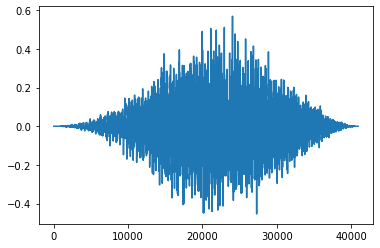

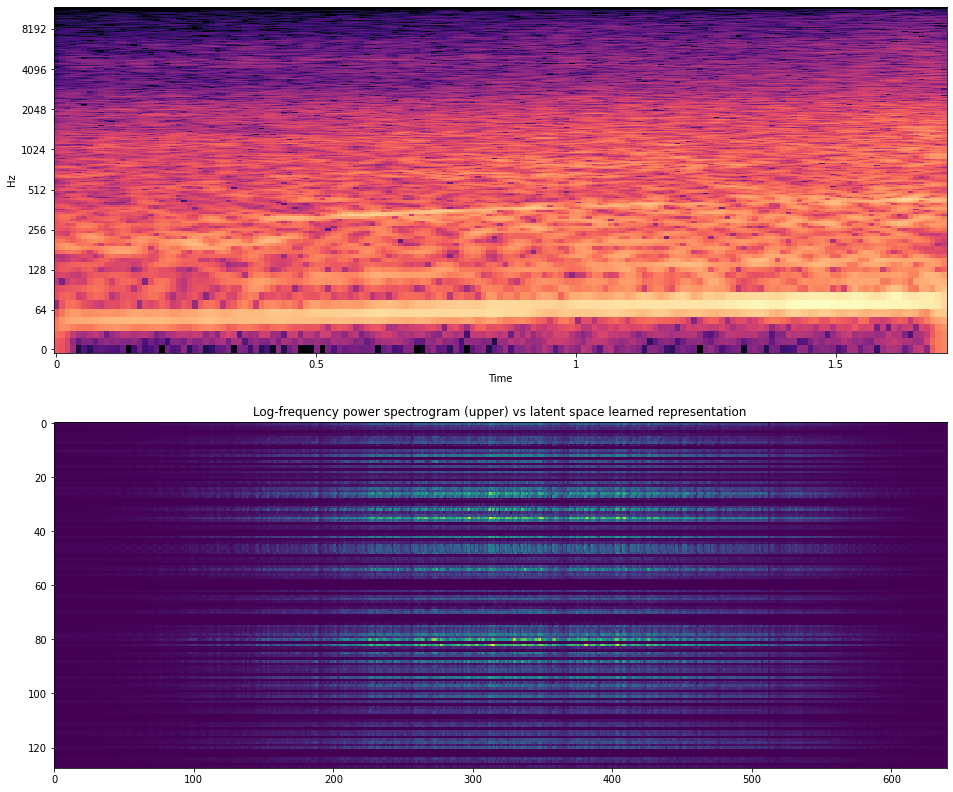

In [4]:
model = tf.keras.models.load_model('Models/1epoch_LSTM_RAe2e_notime_rnns_1000sc')
#model = Thesis_models.LSTM_backend(10, 4096, 128, 64, n_of_classes=5, frame_level_classification=False, output_dim=64, melspec=True, sr=sr)
model.summary()

import scipy

#path = '/Users/arvidfalch/repos/Vehicles/Air/Drones/Aircraft_Radio_Controlled_Drone_Start_Engines_Slow_Not_Lifting_Off_Then_Stop_Syma_X5SW_SND29303.wav'
#path = '/Users/arvidfalch/repos/arvidfalch/Dataset2/2019-03-20_rangetest/2019-03-20T13.34.02UTC_Vestby_R128-1-00002_Rangetest - preflight_from_0.13s_to_38.97s/gain_39dB/label_type_track_2.wav'
# drone
#path = '/Users/arvidfalch/repos/scaper_test/soundscapes/soundscape_unimodal4.wav'
# short drone
#path = '/Users/arvidfalch/repos/scaper_test/soundscapes/soundscape_unimodal7.wav'
# stab
#path = '/Users/arvidfalch/Desktop/BLLTImpt_Bullets_Impact_Body_Thump_Soundly_SND6360.wav'
#path = '/Users/arvidfalch/Desktop/Ambience, Birdsong, Animal, Bird, Flamboyant Tweet SND82146.wav'
path = '/Users/arvidfalch/Desktop/Truck Large Diesel Or Military Tank Apc Armored Personnel Carrier Accelerate Big Rev And Pull Away Then Other Distant Engine Rev And Another One Close Pass By Saravena, Colombia 2016 by kyles Id-405086 4.wav'
signal, _ = librosa.load(path, sr = sr, mono=True)

startpoint = 0
chunk = 4096
segment_size = 10*chunk

test = signal[startpoint:startpoint+segment_size]
hann_window= scipy.signal.windows.hann(test.size)
test = test * hann_window
plt.plot(test)
test = test[...,tf.newaxis]
test = test[tf.newaxis, ...]
print(test.shape)
test = np.reshape(test, (1, 10, 4096, 1))

layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(test)
  
layer_names = []
  
for layer in model.layers[:]:
  layer_names.append(layer.name)
print(layer_names)
print(len(layer_names))
print(layer_names[5])
cont = activations[5]
cont = tf.squeeze(cont)
#cont = tf.transpose(cont, [1, 0])

import librosa.display
x = signal[startpoint:startpoint+segment_size]
hop_length = 256
fig, ax = plt.subplots(figsize= (16,14), nrows=2, ncols=1, sharex=False)


D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)),

                            ref=np.max)

librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,

                         x_axis='time', ax=ax[0])

cont = np.reshape(cont, (-1, 128))
cont = np.transpose(cont, (1, 0))
ax[0] = plt.imshow(cont, cmap ='viridis', interpolation='none', aspect='auto') 

ax[1].set(title='Log-frequency power spectrogram (upper) vs latent space learned representation')

ax[1].label_outer()

batch_layer_8


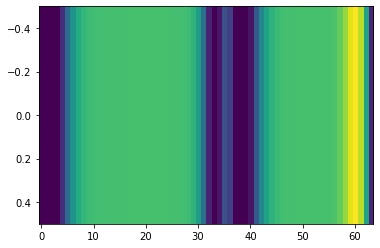

In [26]:
layeridx = 41
print(layer_names[35])
plt.imshow(activations[layeridx][0,:,:,5], cmap='viridis', aspect='auto')



time_distributed_6


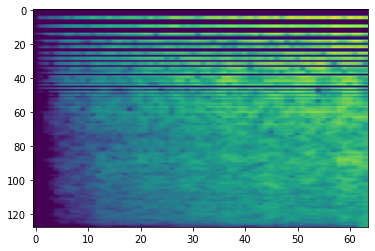

In [4]:
layeridx = 7

print(layer_names[layeridx])
plt.imshow(activations[layeridx][0,0,:,:], cmap ='viridis', aspect='auto')

In [6]:
print(layer_names)
print(activations[1].shape)

['input', 'conv', 'conv_activation', 'conv_smoothing', 'conv_smoothing_activation', 'max_pooling', 'reshape', 'bidirectional', 'LSTM_1', 'LSTM_2', 'Dense_Xtra', 'Dense_layer']
(1, 10, 4096, 128)


In [18]:
# Listen to filters of first conv1D layer
import IPython.display as ipd

filter = 120 # Number between 0 and 128
audio = np.array([])
for i in range(activations[1].shape[1]):
  audio = np.append(audio, activations[1][0,i,:,filter])
ipd.Audio(audio, rate=sr)

In [27]:
# Listen to filters of second conv1D layer


filter = 50 # Number between 0 and 128
audio = np.array([])
for i in range(activations[1].shape[1]):
  audio = np.append(audio, activations[1][0,i,:,filter])
ipd.Audio(audio, rate=sr)

conv


TypeError: Invalid shape (4096,) for image data

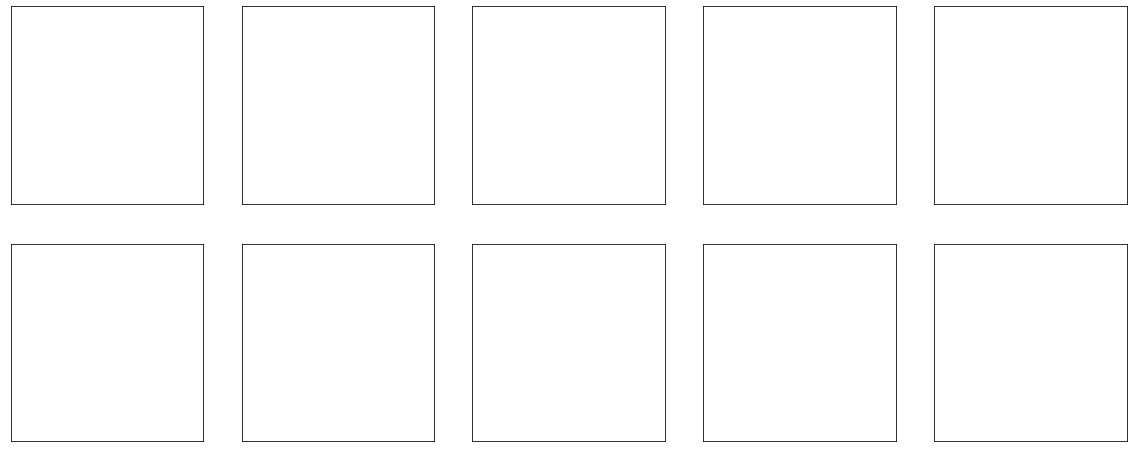

In [9]:

layeridx = 1

print(layer_names[layeridx])

fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(10), axes.ravel()):
    
    ax.imshow(activations[layeridx][0, i, :, ], cmap ='viridis', aspect='auto')
    #ax.invert_yaxis()

Maxpool2D_7


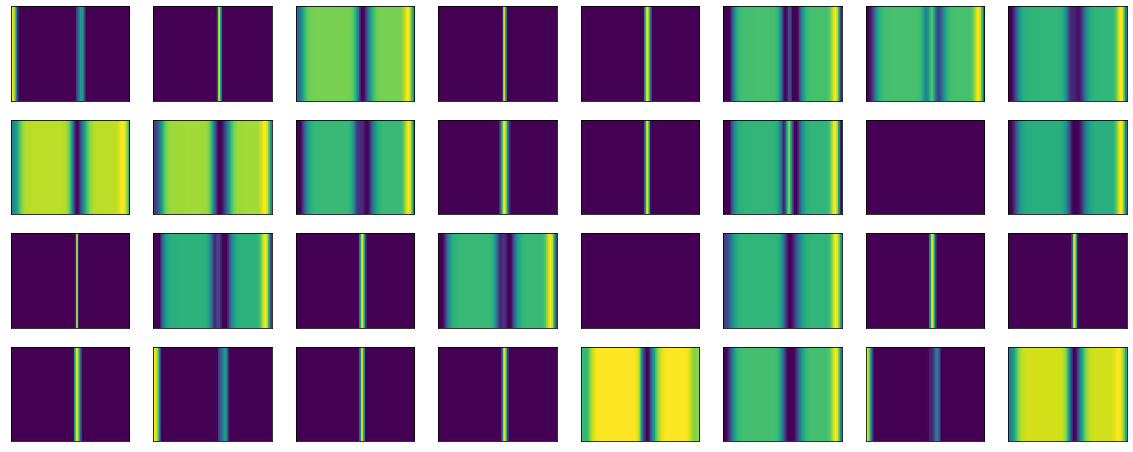

In [28]:

layeridx = 41

print(layer_names[layeridx])

fig, axes = plt.subplots(4,8, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(32), axes.ravel()):
    
    ax.imshow(activations[layeridx][0, :, :, i], cmap ='viridis', aspect='auto')
    #ax.invert_yaxis()

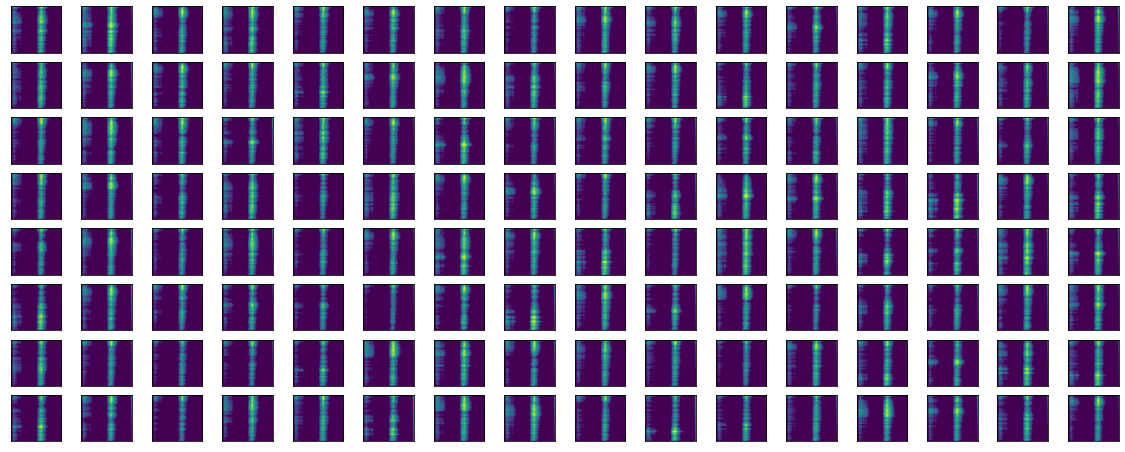

In [29]:
def fft_of_filters_in_layer(activations, layer_n, filter_n):
    x = activations[layer_n][-1]
    y = tf.transpose(x, [1,0])
    y = y.numpy()
    mel = librosa.feature.melspectrogram(y=y[filter_n], n_fft=2048, hop_length=345, n_mels=128)
    mel = librosa.power_to_db(mel)
    #librosa.display.specshow(mel)
    return mel

#fft_of_filters_in_layer(activations, 2, 125)

fig, axes = plt.subplots(8,16, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(128), axes.ravel()):
    mel = fft_of_filters_in_layer(activations, 1, i)
    ax.imshow(mel)

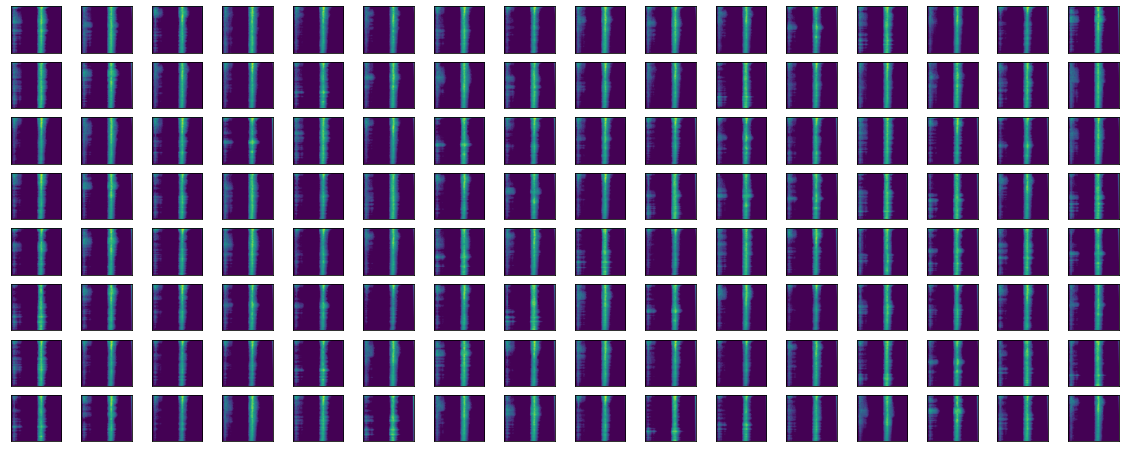

In [30]:
fig, axes = plt.subplots(8,16, subplot_kw={'xticks':(), 'yticks':()}, figsize=(20,8))
for i, ax in zip(range(128), axes.ravel()):
    mel = fft_of_filters_in_layer(activations, 2, i)# should be (activations, :, i)
    ax.imshow(mel)

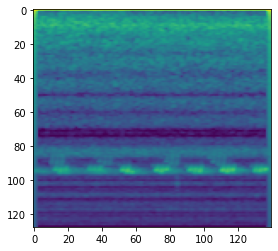

In [40]:
mel = fft_of_filters_in_layer(activations, 2, 122)
plt.imshow(mel)